### **Problems**

Given the volume function of a balloon:
$$ V(t) = \frac{6}{4t + 1} $$

### **Part (a): Average Rate of Change**

Compute (accurate to at least 8 decimal places) the average rate of change of volume between:
- Fixed point: $t_1 = 0.25$  
- Variable point: $t_2$ = following values:

#### Right-side Points ($t_2 > 0.25$):

(i) $t_2 = 1$  
(ii) $t_2 = 0.5$  
(iii) $t_2 = 0.251$  
(iv) $t_2 = 0.2501$  
(v) $t_2 = 0.25001$

#### Left-side Points ($t_2 < 0.25$):

(vi) $t_2 = 0$  
(vii) $t_2 = 0.1$  
(viii) $t_2 = 0.249$  
(ix) $t_2 = 0.2499$  
(x) $t_2 = 0.24999$

**Formula**:  
Average Rate of Change $= \frac{V(t_2) - V(0.25)}{t_2 - 0.25}$

### **Part (b): Instantaneous Rate of Change**

Using results from part (a):
1. Estimate the instantaneous rate of change at $t = 0.25$

---

### **Solutions**

### **Part (a): Corrected Average Rates of Change**

#### Right-side Corrected:

| t₂     | Correct Average Rate |
|--------|----------------------|
| 0.251  | -5.976095617 |
| 0.2501 | -5.997600958 |
| 0.25001| -5.999760010 |
#### Left-side Corrected:

| t₂     | Correct Average Rate |
|--------|----------------------|
| 0.249  | -6.023904382 |
| 0.2499 | -6.002399042 |
| 0.24999| -6.000239990 |

### **Part (b): Instantaneous Rate of Change**

The average rates converge to:
$$ \boxed{-6.0} $$

**Verified by derivative**:
$$ V'(t) = -\frac{24}{(4t+1)^2} $$
$$ V'(0.25) = -\frac{24}{4} = \boxed{-6.0} $$

#### Tangent Line at t=0.25:
$$ \boxed{V(t) = -6t + 4.5} $$

### **Visualization**

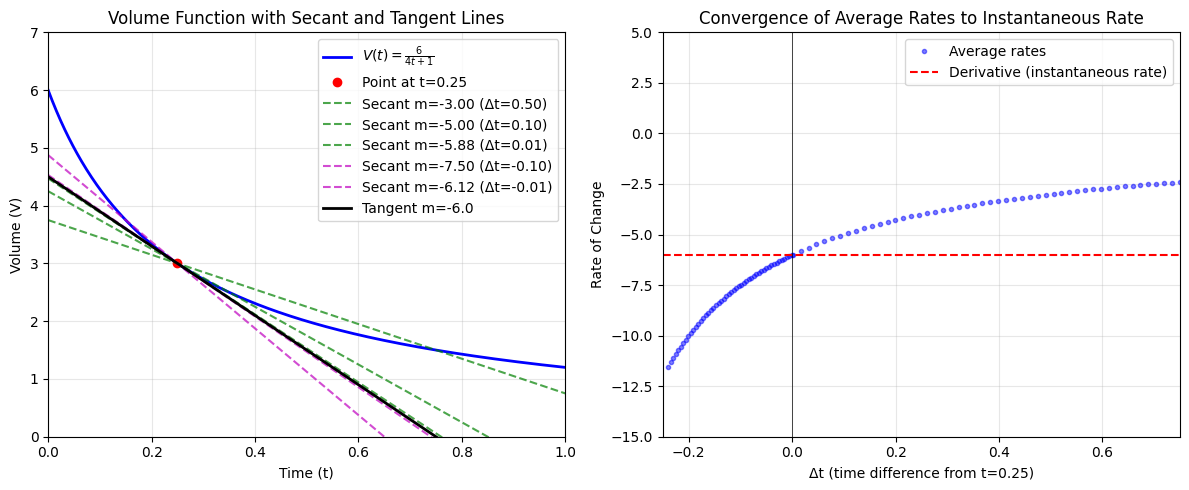

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the volume function and its derivative
def V(t):
    return 6 / (4*t + 1)

def dV(t):
    return -24 / (4*t + 1)**2

# Create time values (avoiding t = -0.25 where denominator would be zero)
t = np.linspace(0, 1, 500)
t0 = 0.25
V0 = V(t0)

# Create figure with two subplots
plt.figure(figsize=(12, 5))

# Plot 1: Volume function with secant lines
plt.subplot(1, 2, 1)
plt.plot(t, V(t), 'b-', label=r'$V(t) = \frac{6}{4t+1}$', linewidth=2)
plt.plot(t0, V0, 'ro', label=f'Point at t={t0}')

# Add secant lines (avoiding dt=0)
for dt in [0.5, 0.1, 0.01, -0.1, -0.01]:
    t_sec = t0 + dt
    m = (V(t_sec) - V0)/dt
    secant = V0 + m*(t - t0)
    color = 'g' if dt > 0 else 'm'
    plt.plot(t, secant, f'{color}--', alpha=0.7, 
             label=f'Secant m={m:.2f} (Δt={dt:.2f})')

# Add tangent line
tangent = V0 + dV(t0)*(t - t0)
plt.plot(t, tangent, 'k-', label=f'Tangent m={dV(t0):.1f}', linewidth=2)

plt.title('Volume Function with Secant and Tangent Lines')
plt.xlabel('Time (t)')
plt.ylabel('Volume (V)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 7)

# Plot 2: Rate of change visualization (carefully avoiding dt=0)
plt.subplot(1, 2, 2)
dt_values_pos = np.linspace(0.001, 0.75, 50)
dt_values_neg = np.linspace(-0.24, -0.001, 50)
dt_values = np.concatenate([dt_values_neg, dt_values_pos])
rates = [(V(t0 + dt) - V0)/dt for dt in dt_values]

plt.plot(dt_values, rates, 'b.', alpha=0.5, label='Average rates')
plt.axhline(dV(t0), color='r', linestyle='--', label='Derivative (instantaneous rate)')
plt.axvline(0, color='k', linewidth=0.5)
plt.title('Convergence of Average Rates to Instantaneous Rate')
plt.xlabel('Δt (time difference from t=0.25)')
plt.ylabel('Rate of Change')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(-0.25, 0.75)
plt.ylim(-15, 5)

plt.tight_layout()
plt.show()